# Hypothesis Testing - Age

In [1]:
source("C2Score_Age_Hypotheses.R")

# Let's see an overview of sytems ages since '2017-06-01'. 
# Select just ages > 30. Because every system was 
# dbData = getC2ScoreDbData("select * from ReturnsDataInIntervalsCleaned where age > 30")


sql = "select 
	 r.DateStart,
	 r.Systemid,
     (DATEDIFF(r.DateStart, Date(from_unixtime(c2systems.added))) + 1) as Age
     from ReturnsDataInIntervalsCleaned r 
	 join c2systems on r.systemid=c2systems.guid; "
agesData = getC2ScoreDbData(sql);

,DateStart,Systemid,Age
,<chr>,<dbl>,<dbl>
1,2017-06-01,13202557,4488
2,2017-06-01,21522544,4010
3,2017-06-01,22906062,3894
4,2017-06-01,27363168,3593
5,2017-06-01,30415311,3410
6,2017-06-01,32020445,3318


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    61.0   187.0   444.6   507.0  5833.0 

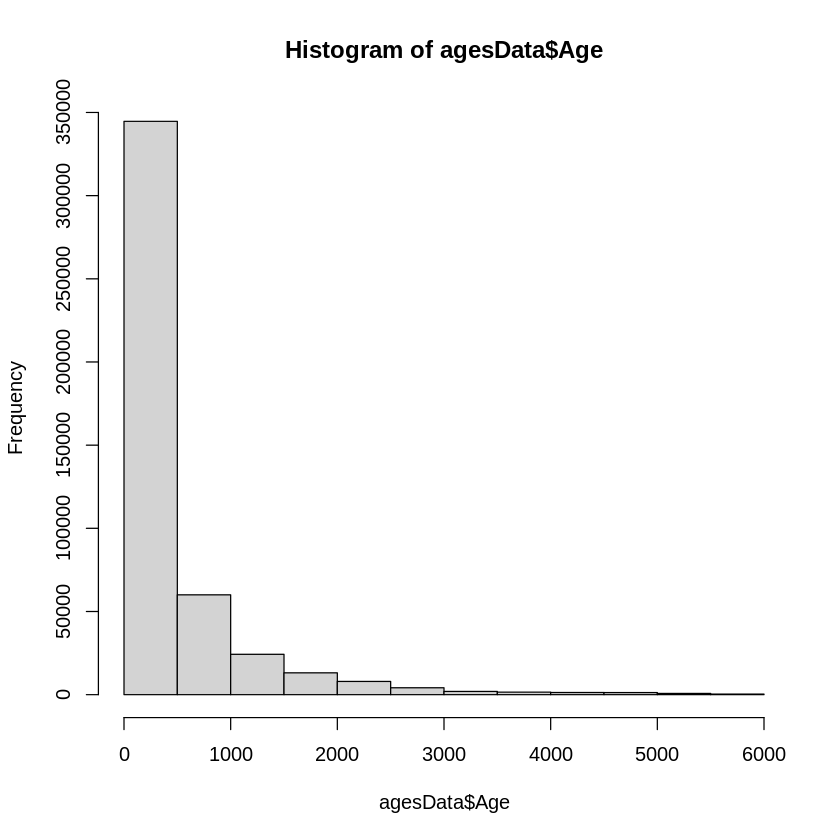

In [2]:
head(agesData)
summary(agesData$Age)
hist(agesData$Age)

Look at Median and Mean. They are very far apart.

Well, we have a couple of trading systems from years 2005-2010. Those systems are very old now and their ages shift the whole population age mean up. 

In [3]:
sql = "select 
	 r.DateStart,
	 r.Systemid,
     (DATEDIFF(r.DateStart, Date(from_unixtime(c2systems.added))) + 1) as Age
     from ReturnsDataInIntervalsCleaned r 
	 join c2systems on r.systemid=c2systems.guid
     where Date(from_unixtime(c2systems.added)) >= '2017-06-01'"
# agesData = getC2ScoreDbData(sql);
#head(agesData)
# summary(agesData$Age)

It looks better. Median and mean are much closer to each other.

In [4]:
#hist(agesData$Age)

In [6]:
agesExpandingData = getC2ScoreDbData("select * from SystemsAgesHistory");
head(agesExpandingData)
tail(agesExpandingData)

,DateStart,Count,AvgAge,StdAge
,<chr>,<dbl>,<dbl>,<dbl>
1,2017-06-01 00:00:00,2,2.0000,0.0000000
2,2017-06-02 00:00:00,5,2.4000,0.4898979
3,2017-06-03 00:00:00,5,3.4000,0.4898979
4,2017-06-04 00:00:00,6,4.0000,1.0000000
5,2017-06-05 00:00:00,10,3.8000,1.6613248
6,2017-06-06 00:00:00,12,4.3333,1.8408935


,DateStart,Count,AvgAge,StdAge
,<chr>,<dbl>,<dbl>,<dbl>
1340,2021-01-30 00:00:00,614,212.5098,231.5929
1341,2021-01-31 00:00:00,614,213.5098,231.5929
1342,2021-02-01 00:00:00,605,215.4496,232.7662
1343,2021-02-02 00:00:00,589,213.7963,231.4978
1344,2021-02-03 00:00:00,568,212.3486,232.6192
1345,2021-02-04 00:00:00,553,212.4268,230.4874


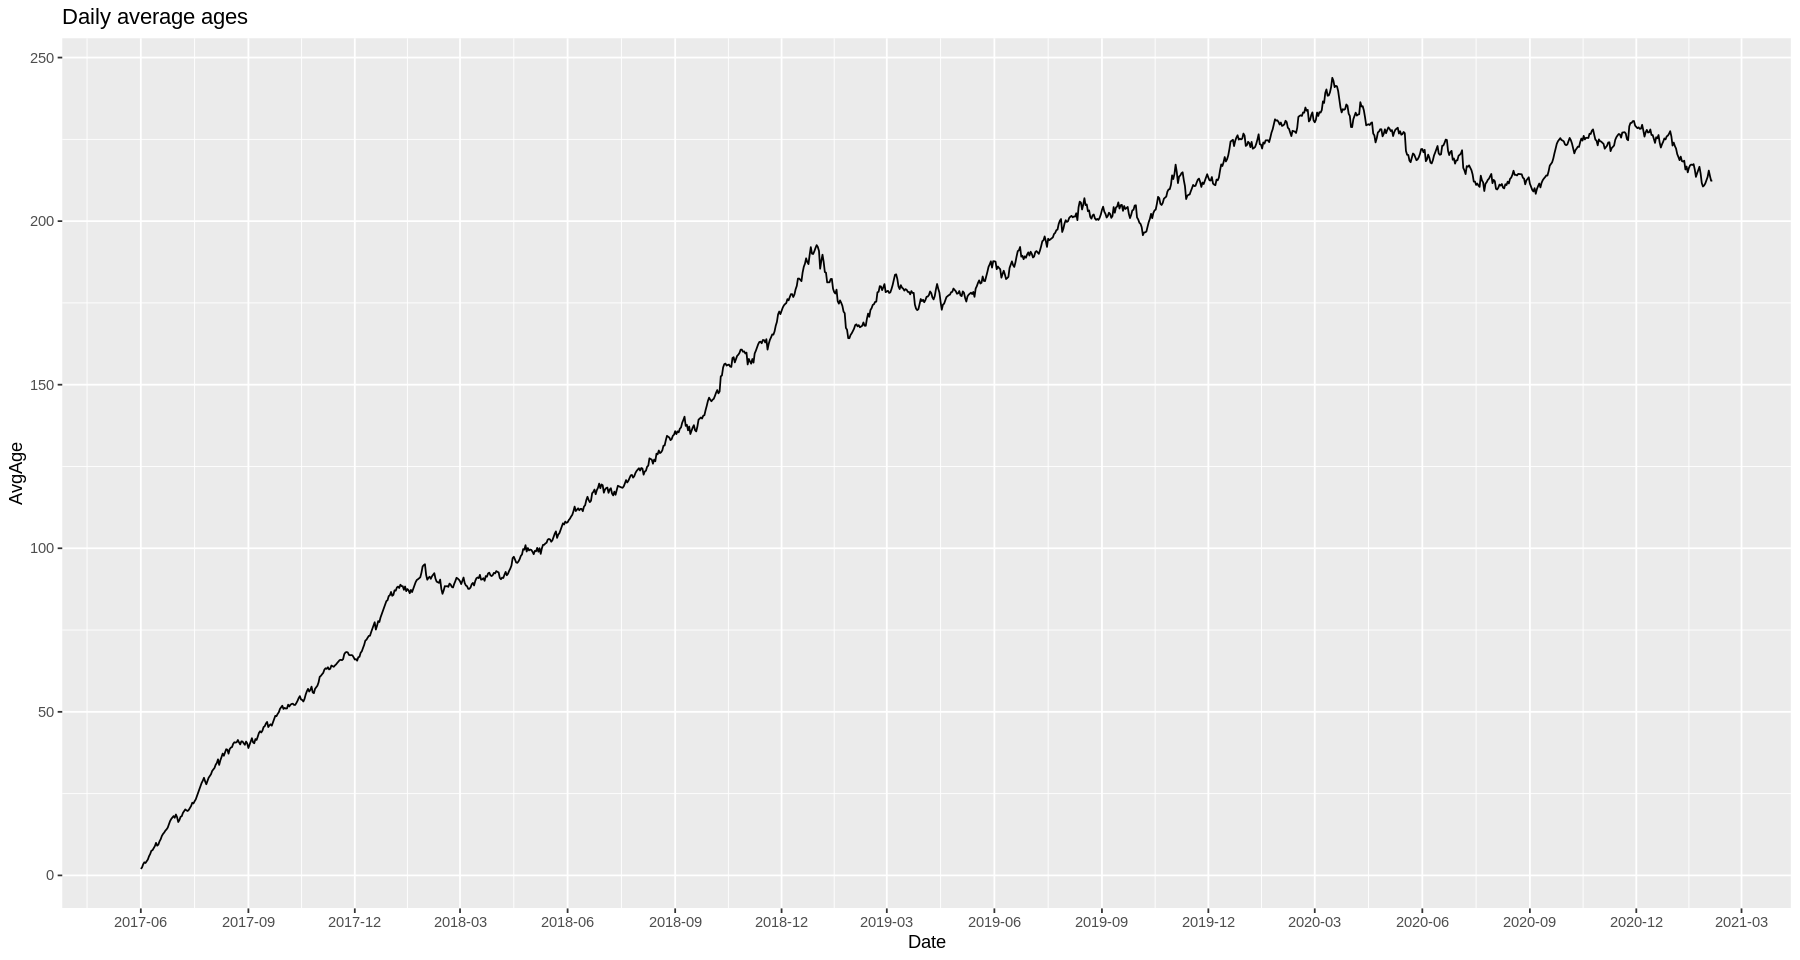

In [7]:
options(repr.plot.width=15, repr.plot.height=8)

ggplot(agesExpandingData, aes(x=as.Date(DateStart), y=AvgAge)) + 
      ggtitle("Daily average ages") + 
      geom_line() + 
      xlab("Date") + 
      scale_x_date(date_labels = "%Y-%m",date_breaks = "3 months")    


OK. I think we are prepared for our first hypothesis testing: Does have AGE any impact on trading systems average returns?

Our null hypothesis is: No. Average returns are the same regardless of the trading systems ages.

Let's test this hypothese for systems older then 30, 60, ..., 180 days.

Recall the population stats:


In [20]:
populationReturnsInIntervals()

,RetDaysInterval,Count,Mean,SD
,<chr>,<dbl>,<dbl>,<dbl>
2,007,456181,-0.0289,0.191
3,014,451675,-0.0561,0.263
4,021,447317,-0.0815,0.313
5,030,441860,-0.1115,0.363
6,060,425017,-0.1878,0.462
7,090,409120,-0.2472,0.520
8,120,394181,-0.2956,0.554
9,150,379854,-0.3367,0.579
10,180,366038,-0.3722,0.599


In [21]:
# Hypothesis: If we select systems younger than 30 days. Will be the average return the same after 7, 14,... 180 days?

In [65]:
ageLt030 = getC2ScoreDbData("call GetSystemsByAge(30, 1)");
ageLt030
ageGt030 = getC2ScoreDbData("call GetSystemsByAge(30, 0)");
ageGt030

ageLt180 = getC2ScoreDbData("call GetSystemsByAge(180, 1)");
ageLt180
ageGt180 = getC2ScoreDbData("call GetSystemsByAge(180, 0)");
ageGt180

Observations,avgRet007,stdRet007,avgRet014,stdRet014,avgRet021,stdRet021,avgRet030,stdRet030,avgRet060,stdRet060,avgRet090,stdRet090,avgRet120,stdRet120,avgRet150,stdRet150,avgRet180,stdRet180
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
67518,-0.0662,0.278,-0.137,0.385,-0.206,0.453,-0.285,0.511,-0.439,0.588,-0.54,0.61,-0.615,0.588,-0.67,0.564,-0.713,0.549


Observations,avgRet007,stdRet007,avgRet014,stdRet014,avgRet021,stdRet021,avgRet030,stdRet030,avgRet060,stdRet060,avgRet090,stdRet090,avgRet120,stdRet120,avgRet150,stdRet150,avgRet180,stdRet180
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
273497,-0.0421,0.22,-0.0798,0.297,-0.113,0.35,-0.154,0.4,-0.267,0.499,-0.358,0.549,-0.435,0.573,-0.5,0.586,-0.555,0.589


Observations,avgRet007,stdRet007,avgRet014,stdRet014,avgRet021,stdRet021,avgRet030,stdRet030,avgRet060,stdRet060,avgRet090,stdRet090,avgRet120,stdRet120,avgRet150,stdRet150,avgRet180,stdRet180
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
217401,-0.0569,0.255,-0.11,0.346,-0.159,0.405,-0.215,0.459,-0.351,0.547,-0.447,0.583,-0.523,0.587,-0.582,0.584,-0.633,0.576


Observations,avgRet007,stdRet007,avgRet014,stdRet014,avgRet021,stdRet021,avgRet030,stdRet030,avgRet060,stdRet060,avgRet090,stdRet090,avgRet120,stdRet120,avgRet150,stdRet150,avgRet180,stdRet180
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
123614,-0.0292,0.186,-0.0572,0.256,-0.084,0.307,-0.117,0.357,-0.214,0.464,-0.301,0.524,-0.378,0.558,-0.447,0.578,-0.505,0.591


In [94]:
#z.test.left(-0.0289, ageGt180$Observations, ageGt180$avgRet007, 0.278,0.05)
cat("H0: Age <= 30 has no effect to 7 days returns\n")
cat("H1: Age <= 30 causes different 7 days returns\n")
z.test.twoTails(ageLt030$avgRet007, ageLt030$Observations, -0.0289, 0.191, 0.05)

cat("H0: Age > 30 has no effect to 7 days returns\n")
cat("H1: Age > 30 causes different 7 days returns\n")
z.test.twoTails(-0.0289, ageGt030$Observations, ageGt030$avgRet007, 0.191, 0.05)

cat("H0: Age <= 30 has no effect to 180 days returns\n")
cat("H1: Age <= 30 causes different 180 days returns\n")
z.test.twoTails(-0.3722,  ageLt030$Observations, ageLt030$avgRet180, 0.599, 0.05)

cat("H0: Age > 30 has no effect to 180 days returns\n")
cat("H1: Age > 30 causes different 180 days returns\n")
z.test.twoTails(-0.3722, ageGt030$Observations, ageGt030$avgRet180, 0.599, 0.05)

cat("----------------------\n")
# Left tail test
# H0: mu >= mu0
# H1: mu < mu0
cat("xxxxxxxxxH0: 7 days return of systems having Age <= 30 is the same (or less) than population return\n")
cat("xxxxxxxxxH1: 7 days return of systems having Age <= 30 is greater than population 7 days\n")
z.test.left(-0.0289, ageLt030$Observations, ageLt030$avgRet007, 0.191, 0.05)

# Right tail test
# H0: mu <= mu0
# H1: mu > mu0
cat("yyyyyyyyH0: Population 7 days average return is <= than return of systems having Age <= 30 (selected are better)\n")
cat("yyyyyyyyH1: Population 7 days average return > than return of systems having Age <= 30 (selected are worse)\n")
z.test.right(-0.0289, ageLt030$Observations, ageLt030$avgRet007, 0.191, 0.05)

cat("aaaaaaaaaH0: Population 180 days average return is >= than return of systems having Age <= 30 (selected are worse)\n")
cat("aaaaaaaaaH1: Population 180 days average return < than return of systems having Age <= 30 (selected are better)\n")
z.test.left(-0.3722, ageLt030$Observations, ageLt030$avgRet180, 0.599, 0.05)

cat("bbbbbbbbbH0: Population 180 days average return is <= than return of systems having Age <= 30 (selected are better)\n")
cat("bbbbbbbbbH1: Population 180 days average return > than return of systems having Age <= 30 (selected are worse)\n")
z.test.right(-0.3722, ageLt030$Observations, ageLt030$avgRet180, 0.599, 0.05)

cat("---------- TODO ------------\n")
skip = '
cat("H1: Age > 30 causes worse 7 days returns\n")
z.test.left(ageGt030$avgRet007,ageGt030$Observations, -0.0289, ageGt030$stdRet007,0.05)
cat("H1: Age > 30 causes better 7 days returns\n")
z.test.right(ageGt030$avgRet007,ageGt030$Observations, -0.0289, ageGt030$stdRet007,0.05)

cat("H1: Age > 30 causes worse 180 days returns\n")
z.test.left(ageGt030$avgRet180,ageGt030$Observations, -0.3722, ageGt030$stdRet180,0.05)
cat("H1: Age > 30 causes better 180 days returns\n")
z.test.right(ageGt030$avgRet180,ageGt030$Observations, -0.3722, ageGt030$stdRet180,0.05)
'
cat("---------- Age <= 180 days ------------\n")

cat("qqqqqqqqqH0: Population 7 days average return is >= than return of systems having Age <= 180 (selected are worse)\n")
cat("qqqqqqqqqH1: Population 7 days average return < than return of systems having Age <= 180 (selected are better)\n")
#cat("H0: Age <= 180 has no effect or causes better 7 days returns\n")
#cat("H1: Age <= 180 causes worse 7 days returns\n")
z.test.left(-0.0289,ageLt180$Observations, ageLt180$avgRet007, 0.191, 0.05)

cat("wwwwwwwwH0: Population 7 days average return is <= than return of systems having Age <= 180 (selected are better)\n")
cat("wwwwwwwwH1: Population 7 days average return > than return of systems having Age <= 180 (selected are worse)\n")
#cat("H0: Age <= 180 has no effect or causes worse 7 days returns\n")
#cat("H1: Age <= 180 causes better 7 days returns\n")
z.test.right(-0.0289,ageLt180$Observations, ageLt180$avgRet007, 0.191,0.05)

cat("H0: Age <= 180 has no effect or causes better 180 days returns\n")
cat("H1: Age <= 180 causes worse 180 days returns\n")
z.test.left(ageLt180$avgRet180,ageLt180$Observations, -0.3722, ageLt180$stdRet180,0.05)

cat("H0: Age <= 180 has no effect or causes worse 180 days returns\n")
cat("H1: Age <= 180 causes better 180 days returns\n")
z.test.right(ageLt180$avgRet180,ageLt180$Observations, -0.3722, ageLt180$stdRet180,0.05)

cat("---------- Age > 180 days ------------\n")

# Left tail test
# H0: mu >= mu0
# H1: mu < mu0
cat("gggggggggH0: Population 7 days average return is >= than return of systems having Age > 180 (selected are worse)\n")
cat("gggggggggH1: Population 7 days average return < than return of systems having Age > 180 (selected are better)\n")
#cat("H0: Age > 180 has no effect or causes worse 7 days returns\n")
#cat("H1: Age > 180 causes better 7 days returns\n")
z.test.left(-0.0289, ageGt180$Observations, ageGt180$avgRet007, 0.191,0.05)

cat("uuuuuuuuH0: Population 7 days average return is <= than return of systems having Age > 180 (selected are better)\n")
cat("uuuuuuuuH1: Population 7 days average return > than return of systems having Age > 180 (selected are worse)\n")
#cat("H0: Age > 180 has no effect or causes better 7 days returns\n")
#cat("H1: Age > 180 causes worse 7 days returns\n")
z.test.right(-0.0289, ageGt180$Observations, ageGt180$avgRet007, 0.191, 0.05)

cat("hhhhhhhhhH0: Population 180 days average return is >= than return of systems having Age > 180 (selected are worse)\n")
cat("hhhhhhhhhH1: Population 180 days average return < than return of systems having Age > 180 (selected are better)\n")
#cat("H0: Age > 180 has no effect or causes worse 180 days returns\n")
#cat("H1: Age > 180 causes better 180 days returns\n")
z.test.left(-0.3722, ageGt180$Observations, ageGt180$avgRet180, 0.599,0.05)

cat("zzzzzzzzH0: Population 180 days average return is <= than return of systems having Age > 180 (selected are better)\n")
cat("zzzzzzzzH1: Population 180 days average return > than return of systems having Age > 180 (selected are worse)\n")
#cat("H0: Age > 180 has no effect or causes better 180 days returns\n")
#cat("H1: Age > 180 causes worse 180 days returns\n")
z.test.right(-0.3722, ageGt180$Observations, ageGt180$avgRet180, 0.599,0.05)



H0: Age <= 30 has no effect to 7 days returns
H1: Age <= 30 causes different 7 days returns
[1] "Reject H0"
[1] "Z statistic"
[1] 22.2
[1] "z critical values"
[1] -1.96  1.96
[1] "P value"
[1] 0
[1] "#####################"


[1] 22.2

H0: Age > 30 has no effect to 7 days returns
H1: Age > 30 causes different 7 days returns
[1] "Reject H0"
[1] "Z statistic"
[1] 15.8
[1] "z critical values"
[1] -1.96  1.96
[1] "P value"
[1] 0
[1] "#####################"


[1] 15.8

H0: Age <= 30 has no effect to 180 days returns
H1: Age <= 30 causes different 180 days returns
[1] "Reject H0"
[1] "Z statistic"
[1] 115
[1] "z critical values"
[1] -1.96  1.96
[1] "P value"
[1] 0
[1] "#####################"


[1] 115

H0: Age > 30 has no effect to 180 days returns
H1: Age > 30 causes different 180 days returns
[1] "Reject H0"
[1] "Z statistic"
[1] 124
[1] "z critical values"
[1] -1.96  1.96
[1] "P value"
[1] 0
[1] "#####################"


[1] 124

----------------------
xxxxxxxxxH0: Population 7 days average return is >= than return of systems having Age <= 30 (selected are worse)
xxxxxxxxxH1: Population 7 days average return < than return of systems having Age <= 30 (selected are better)
[1] "Accept H0"
[1] "Z statistic"
[1] 22.2
[1] "z critical value"
[1] -1.64
[1] "P value"
[1] 1
[1] "#####################"


[1] 22.2

yyyyyyyyH0: Population 7 days average return is <= than return of systems having Age <= 30 (selected are better)
yyyyyyyyH1: Population 7 days average return > than return of systems having Age <= 30 (selected are worse)
[1] "Reject H0"
[1] "Z statistic"
[1] 22.2
[1] "z critical value"
[1] 1.64
[1] "P value"
[1] 0
[1] "#####################"


[1] 22.2

aaaaaaaaaH0: Population 180 days average return is >= than return of systems having Age <= 30 (selected are worse)
aaaaaaaaaH1: Population 180 days average return < than return of systems having Age <= 30 (selected are better)
[1] "Accept H0"
[1] "Z statistic"
[1] 115
[1] "z critical value"
[1] -1.64
[1] "P value"
[1] 1
[1] "#####################"


[1] 115

bbbbbbbbbH0: Population 180 days average return is <= than return of systems having Age <= 30 (selected are better)
bbbbbbbbbH1: Population 180 days average return > than return of systems having Age <= 30 (selected are worse)
[1] "Reject H0"
[1] "Z statistic"
[1] 115
[1] "z critical value"
[1] 1.64
[1] "P value"
[1] 0
[1] "#####################"


[1] 115

---------- TODO ------------
---------- Age <= 180 days ------------
qqqqqqqqqH0: Population 7 days average return is >= than return of systems having Age <= 180 (selected are worse)
qqqqqqqqqH1: Population 7 days average return < than return of systems having Age <= 180 (selected are better)
[1] "Accept H0"
[1] "Z statistic"
[1] 29.9
[1] "z critical value"
[1] -1.64
[1] "P value"
[1] 1
[1] "#####################"


[1] 29.9

wwwwwwwwH0: Population 7 days average return is <= than return of systems having Age <= 180 (selected are better)
wwwwwwwwH1: Population 7 days average return > than return of systems having Age <= 180 (selected are worse)
[1] "Reject H0"
[1] "Z statistic"
[1] 29.9
[1] "z critical value"
[1] 1.64
[1] "P value"
[1] 0
[1] "#####################"


[1] 29.9

H0: Age <= 180 has no effect or causes better 180 days returns
H1: Age <= 180 causes worse 180 days returns
[1] "Reject H0"
[1] "Z statistic"
[1] -160
[1] "z critical value"
[1] -1.64
[1] "P value"
[1] 0
[1] "#####################"


[1] -160

H0: Age <= 180 has no effect or causes worse 180 days returns
H1: Age <= 180 causes better 180 days returns
[1] "Accept H0"
[1] "Z statistic"
[1] -160
[1] "z critical value"
[1] 1.64
[1] "P value"
[1] 1
[1] "#####################"


[1] -160

---------- Age > 180 days ------------
gggggggggH0: Population 7 days average return is >= than return of systems having Age > 180 (selected are worse)
gggggggggH1: Population 7 days average return < than return of systems having Age > 180 (selected are better)
[1] "Accept H0"
[1] "Z statistic"
[1] 0.267
[1] "z critical value"
[1] -1.64
[1] "P value"
[1] 0.605
[1] "#####################"


[1] 0.267

uuuuuuuuH0: Population 7 days average return is <= than return of systems having Age > 180 (selected are better)
uuuuuuuuH1: Population 7 days average return > than return of systems having Age > 180 (selected are worse)
[1] "Accept H0"
[1] "Z statistic"
[1] 0.267
[1] "z critical value"
[1] 1.64
[1] "P value"
[1] 0.395
[1] "#####################"


[1] 0.267

hhhhhhhhhH0: Population 180 days average return is >= than return of systems having Age > 180 (selected are worse)
hhhhhhhhhH1: Population 180 days average return < than return of systems having Age > 180 (selected are better)
[1] "Accept H0"
[1] "Z statistic"
[1] 60.5
[1] "z critical value"
[1] -1.64
[1] "P value"
[1] 1
[1] "#####################"


[1] 60.5

zzzzzzzzH0: Population 180 days average return is <= than return of systems having Age > 180 (selected are better)
zzzzzzzzH1: Population 180 days average return > than return of systems having Age > 180 (selected are worse)
[1] "Reject H0"
[1] "Z statistic"
[1] 60.5
[1] "z critical value"
[1] 1.64
[1] "P value"
[1] 0
[1] "#####################"


[1] 60.5

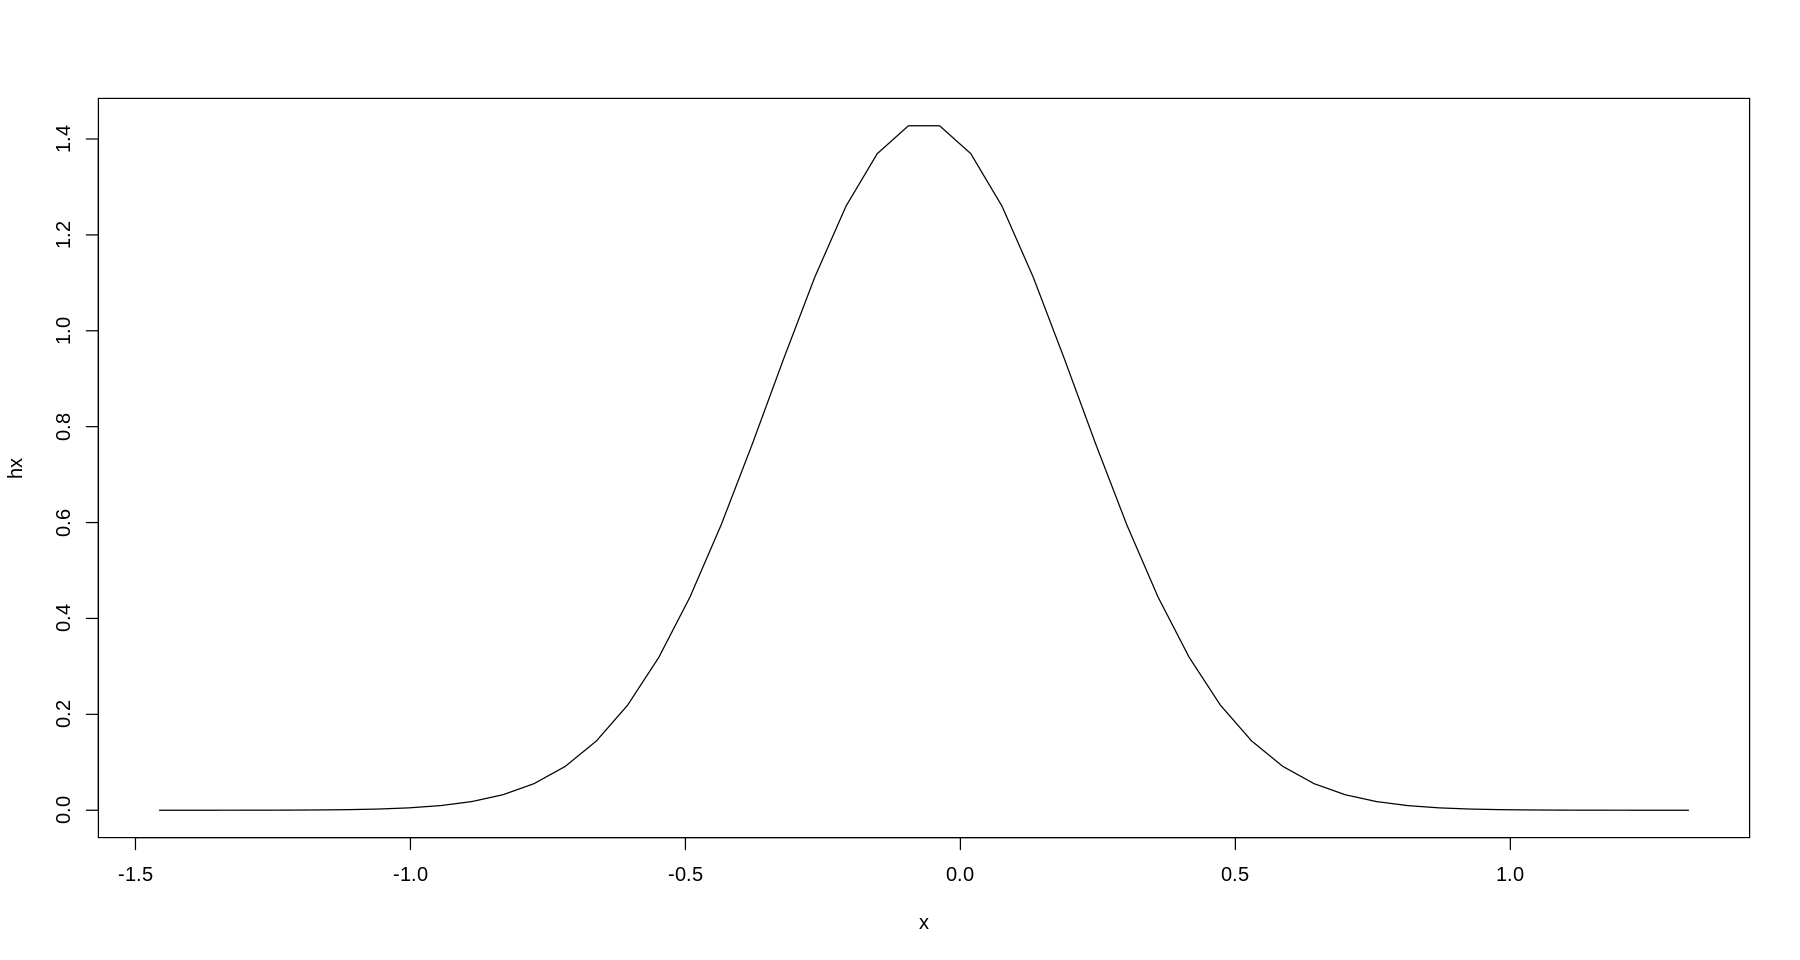

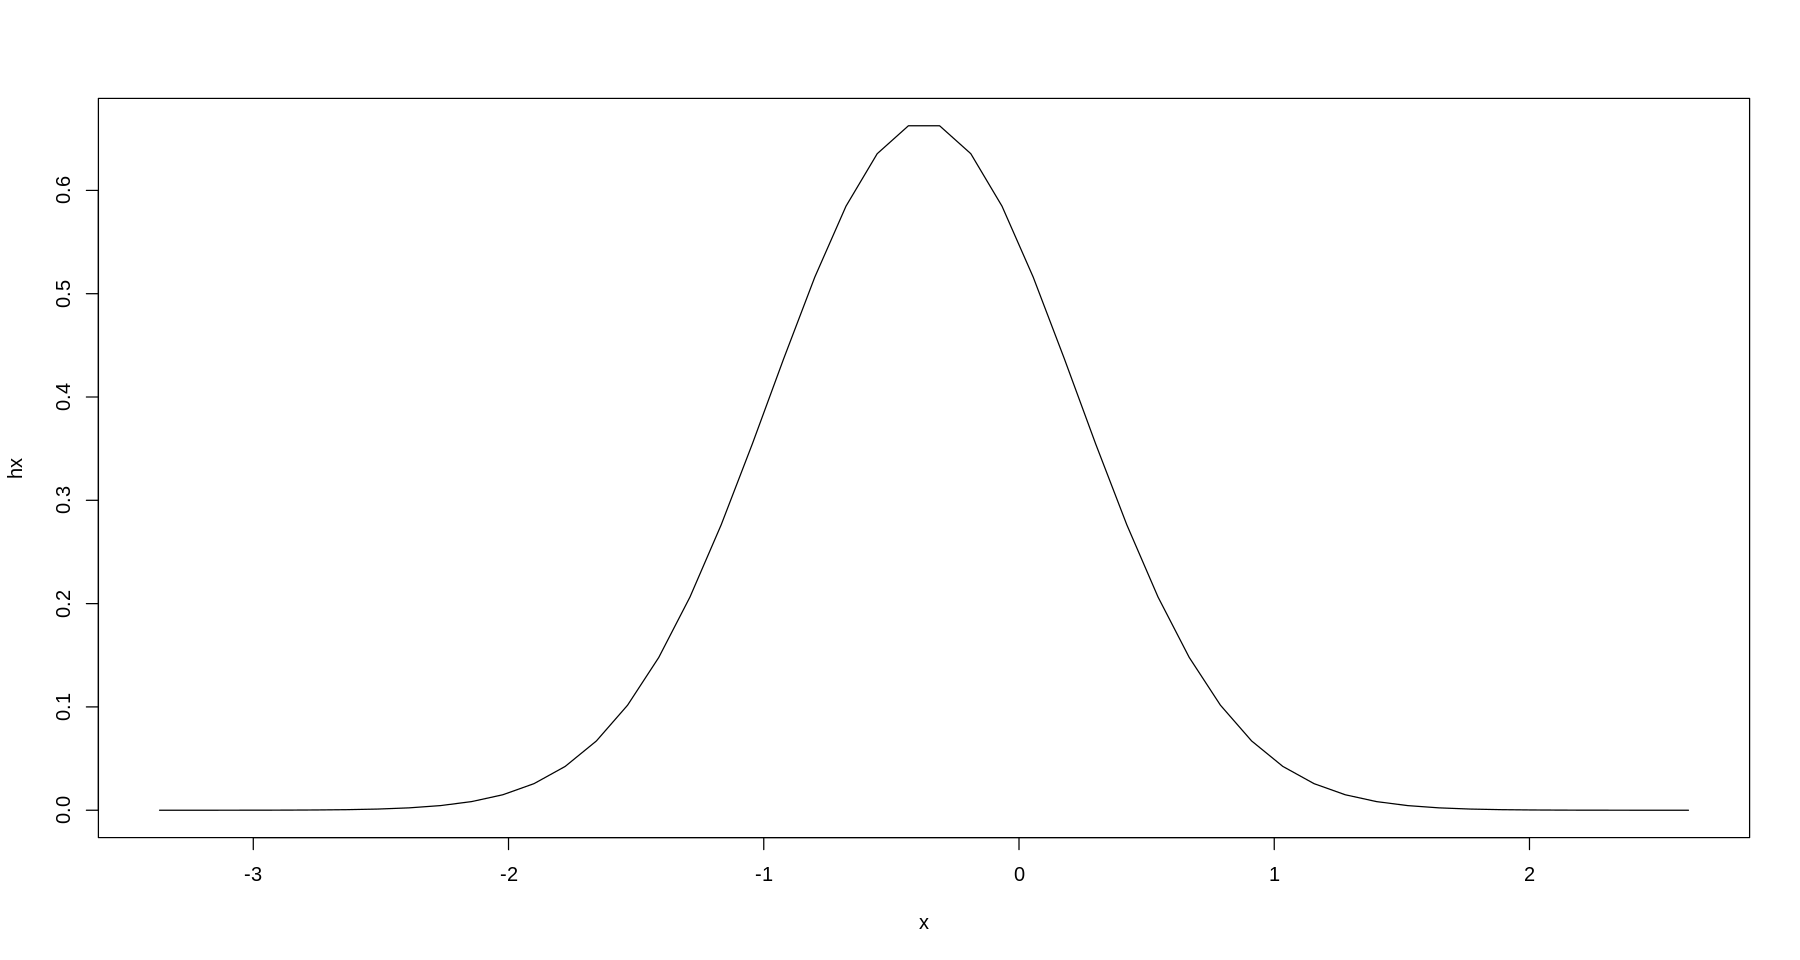

In [86]:
# Normal distribution Population Return007
mean = -0.0289
sd = 0.191
# x = seq(-5,5,length=50)*sd + mean; hx = dnorm(x,mean,sd);plot(x, hx, type="l")

# Normal distribution  Return007 systems age <= 30
mean = -0.0662
sd = 0.278
x = seq(-5,5,length=50)*sd + mean; hx = dnorm(x,mean,sd);plot(x, hx, type="l")




# Normal distribution Population Return180
mean = -0.3722
sd = 0.599
x = seq(-5,5,length=50)*sd + mean; hx = dnorm(x,mean,sd);plot(x, hx, type="l")

# Normal distribution  Return180 systems age > 180
mean = -0.505
sd = 0.591

# Normal distribution  Return180 systems age < 180

mean = -0.633
sd = 0.576

# x = seq(-5,5,length=50)*sd + mean; hx = dnorm(x,mean,sd);plot(x, hx, type="l")



In [33]:
ageLt180 = getC2ScoreDbData("call GetSystemsByAge(180, 1)");
ageLt180
ageGt180 = getC2ScoreDbData("call GetSystemsByAge(180, 0)");
ageGt180

Observations,avgRet007,stdRet007,avgRet014,stdRet014,avgRet021,stdRet021,avgRet030,stdRet030,avgRet060,stdRet060,avgRet090,stdRet090,avgRet120,stdRet120,avgRet150,stdRet150,avgRet180,stdRet180
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
217401,-0.0569,0.255,-0.11,0.346,-0.159,0.405,-0.215,0.459,-0.351,0.547,-0.447,0.583,-0.523,0.587,-0.582,0.584,-0.633,0.576


Observations,avgRet007,stdRet007,avgRet014,stdRet014,avgRet021,stdRet021,avgRet030,stdRet030,avgRet060,stdRet060,avgRet090,stdRet090,avgRet120,stdRet120,avgRet150,stdRet150,avgRet180,stdRet180
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
123614,-0.0292,0.186,-0.0572,0.256,-0.084,0.307,-0.117,0.357,-0.214,0.464,-0.301,0.524,-0.378,0.558,-0.447,0.578,-0.505,0.591


In [36]:
#z.test.left(ageLt180$avgRet007,-0.0289, ageLt180$stdRet007,0.05)
#z.test.left(ageLt180$avgRet180,-0.3722, ageLt180$stdRet180,0.05)
z.test.right(ageLt180$avgRet007,-0.0289, ageLt180$stdRet007,0.05)
z.test.right(ageLt180$avgRet180,-0.3722, ageLt180$stdRet180,0.05)

#z.test.left(ageGt180$avgRet007,-0.0289, ageGt180$stdRet007,0.05)
#z.test.left(ageGt180$avgRet180,-0.3722, ageGt180$stdRet180,0.05)
z.test.right(ageGt180$avgRet007,-0.0289, ageGt180$stdRet007,0.05)
z.test.right(ageGt180$avgRet180,-0.3722, ageGt180$stdRet180,0.05)

[1] "Accept H0"
[1] "Z statistic"
[1] -0.0555
[1] "z critical value"
[1] 1.64
[1] "P value"
[1] 0.522
[1] "#####################"


[1] -0.0555

[1] "Accept H0"
[1] "Z statistic"
[1] -0.344
[1] "z critical value"
[1] 1.64
[1] "P value"
[1] 0.634
[1] "#####################"


[1] -0.344

[1] "Accept H0"
[1] "Z statistic"
[1] -0.000771
[1] "z critical value"
[1] 1.64
[1] "P value"
[1] 0.5
[1] "#####################"


[1] -0.000771

[1] "Accept H0"
[1] "Z statistic"
[1] -0.173
[1] "z critical value"
[1] 1.64
[1] "P value"
[1] 0.569
[1] "#####################"


[1] -0.173

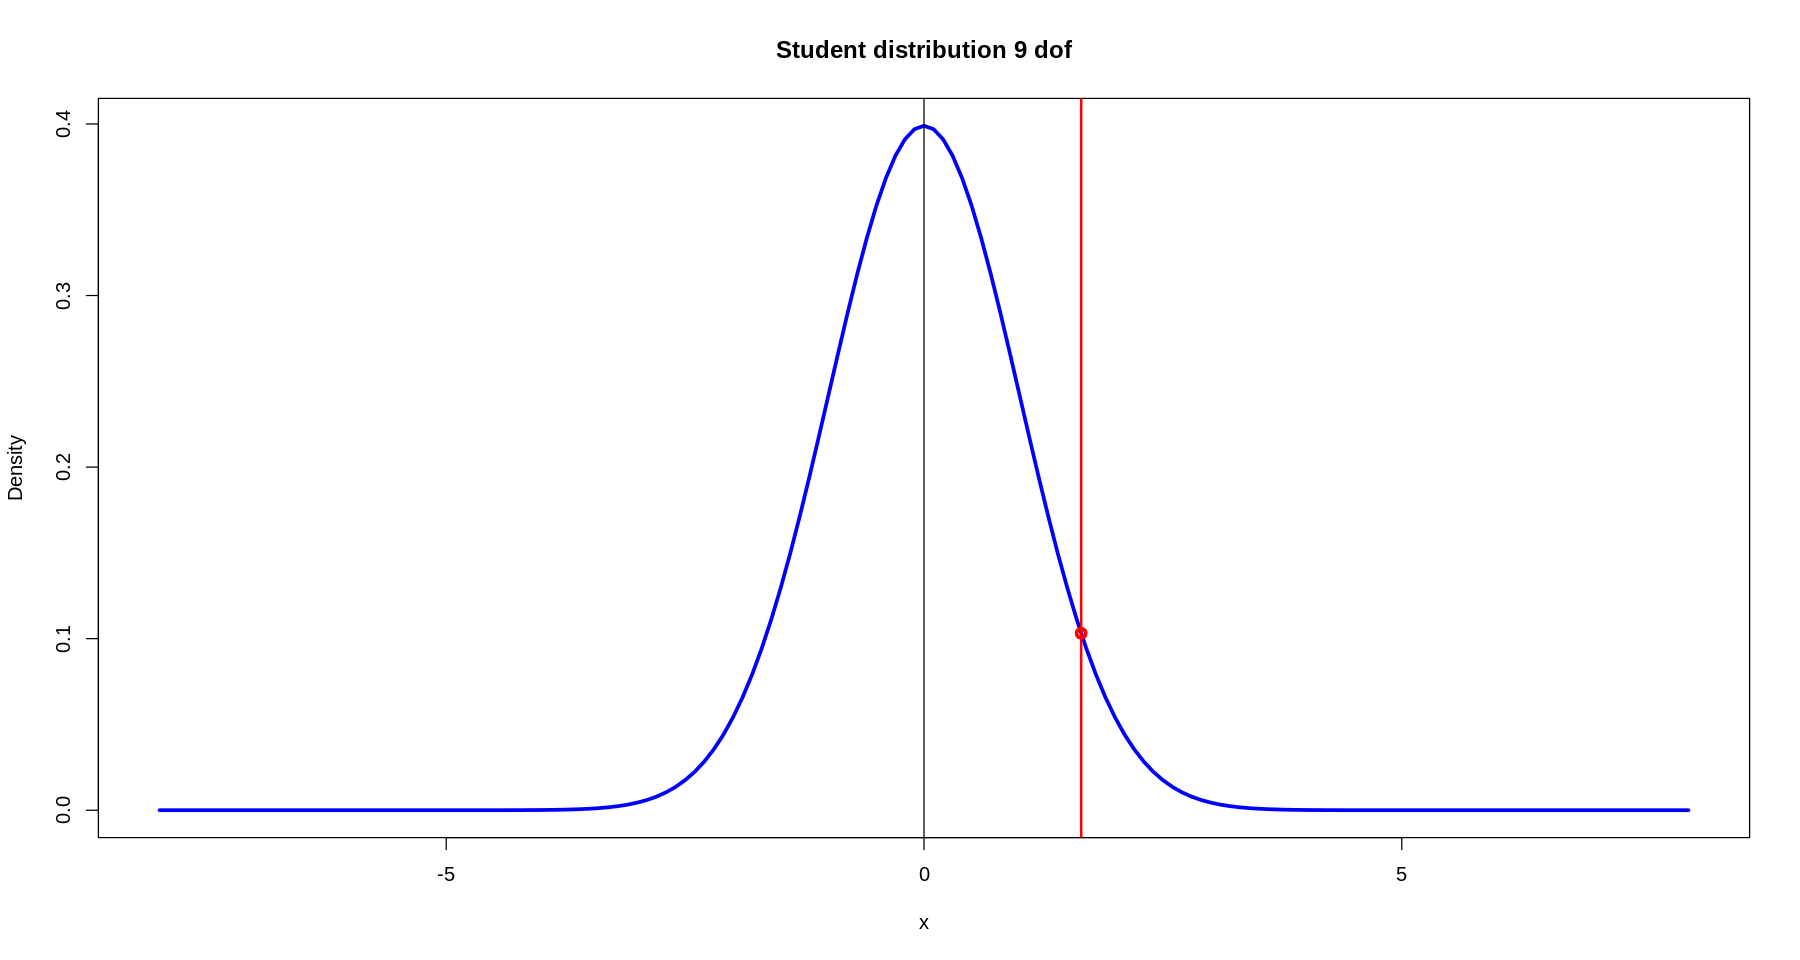

In [83]:
# Plot of the Student distribution
dfs <- 67518 # length(data_vector)-1
x_ <- seq(-8,8,0.1)
y <- dt(x_,dfs)
t.val <- qt(1-0.05,df=dfs)
plot(x_,y,type='l',lwd=3,col='blue',xlab='x',ylab='Density',main='Student distribution 9 dof')
abline(v=0)
abline(v=t.val,lwd=2,col='red')
points(t.val,dt(t.val,dfs),lwd=3,col='red')

In [5]:
agesData = agesInvestigation()

In [6]:
statsDaily = getC2ScoreDbData("select * from ReturnsPopulationStatsDaily")

showData = function(omit,field){
    data = statsDaily # local copy 
    maxDate = date(max(data$DateStart) ) - days(omit) # last date in the database minus OMIT days
    data = data[data$DateStart < maxDate,]  # remove last OMIT days where returns are not defined

    populationCharts(field,data)

    observations = data[,c(field)]
    print(summary(observations))
    cat("Number of observations (days) =",nrow(data)," SD = ",sd(observations),"\n")
}


In [7]:
systemsAges = getC2ScoreDbData("select * from SystemsAges")
head(systemsAges)

,Date,Systemid,Age
,<chr>,<dbl>,<dbl>
1,2017-06-01,13202557,4488
2,2017-06-01,21522544,4010
3,2017-06-01,22906062,3894
4,2017-06-01,27363168,3593
5,2017-06-01,30415311,3410
6,2017-06-01,32020445,3318


In [8]:
summary(systemsAges$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    61.0   187.0   444.6   507.0  5833.0 